In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

### Change later : Simple data description 
- all variables are floating point, except PRI_jet_num which is integer
- variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
- variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by the physicists of ATLAS.
- it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables.

In [3]:
print('y shape = ' + str(y.shape) + '\ntX shape =' + str(tX.shape) + '\nids shape = ' + str(ids.shape))

y shape = (250000,)
tX shape =(250000, 30)
ids shape = (250000,)


Description of the data:
- `y` (N) is composed of the labels (-1 or 1) of all the samples.  
- `tX` (N x F) is composed of the values of the features (F) for all samples (N)  
- `ids` (N) is composed of all the index (100000-349999) of the samples (N)  
  
Moreover, the number of features is 30 (F=30) and the number of samples is 250'000 (N=250'000). Non recorded data has value `-999`. 

## Machine learning

In [4]:
from implementations import *

### Data pre-processing 

In [5]:
# putting the meaningless values to the median of the column
tX = np.where(tX==-999., np.nan,tX)
med_X = np.nanmedian(tX, axis=0)

inds = np.where(np.isnan(tX))
tX[inds] = np.take(med_X, inds[1])

In [6]:
print(np.where(tX[0] == 2))

(array([22], dtype=int64),)


In [7]:
# remove categorical data and standarize the rest
tX = np.delete(tX, 22, axis=1)
tX = np.apply_along_axis(standardize, 1, tX)

y = y[0:10000]
tX = tX[0:10000, :]

### Exploratory analysis

### Feature processing

**Least squares**

In [8]:
(w_ls, loss_ls) = least_squares(y, tX)

print("w* ={w}\n\nmse={loss}".format(
    w=w_ls, loss=loss_ls))

w* =[ -1.63234884  -2.14364764  -2.27071314  -1.5493892  -23.58220505
  -1.47221835  -1.90458059  19.30567861  -1.8573435    1.08952944
 -19.59956461   1.00136465  18.90405615  -3.78213171  -1.6905936
  -1.51078869  -3.5693518   -1.56985962  -1.34976429  -1.57392063
  -1.81614721  -1.75066318  -1.76852796  -1.23090863  -1.87599932
  -2.90560059  -0.67389455  -1.90715947  -4.50324926]

mse=0.3329741225255339


**Least squares with Gradient Descent**

In [9]:
#define parameters

initial_w = np.zeros(tX.shape[1])
max_iters = 100
gammas = np.logspace(-6, -1, 50)

losses_gd = []
ws_gd = []
for gamma in gammas:
    (w, loss) = least_squares_GD(y, tX, initial_w, max_iters, gamma)
    losses_gd.append(loss)
    ws_gd.append(w)

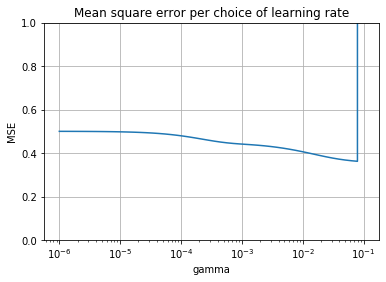

In [10]:
#plot the losses per gamma

fig, ax = plt.subplots()
ax.semilogx(gammas, losses_gd)

ax.set(xlabel='gamma', ylabel='MSE',
       title='Mean square error per choice of learning rate')
ax.grid()
ax.set_ylim([0, 1])
plt.show()

In [11]:
idx = np.nanargmin(losses_gd)

loss_gd = losses_gd[idx]
w_gd = ws_gd[idx]
gamma_gd = gammas[idx]

print("w* ={w}\n\nmse={loss}\n\ngamma={gamma}".format(
    w=w_gd, loss=loss_gd, gamma=gamma_gd ))

w* =[ 0.03832532 -0.53039433 -0.03670507  0.14058118  0.03486975  0.06562288
  0.03250216  0.03785252 -0.06702791  0.05131062  0.02326465  0.05165638
  0.03811925  0.25872194  0.03844767  0.03888653 -0.0952266   0.03845627
  0.04081067 -0.07683066  0.03569317 -0.06369741 -0.06436728  0.03900604
  0.03782905 -0.14979649  0.03971292  0.03803745 -0.03566066]

mse=0.3619424560929475

gamma=0.07906043210907701


**Least squares with Stochastic Gradient Descent**

In [12]:
initial_w = np.zeros(tX.shape[1])
max_iters = 100
gammas = np.logspace(-6, -1, 50)

losses_sgd = []
ws_sgd = []
for gamma in gammas:
    (w, loss) = least_squares_SGD(y, tX, initial_w, max_iters, gamma)
    losses_sgd.append(loss)
    ws_sgd.append(w)

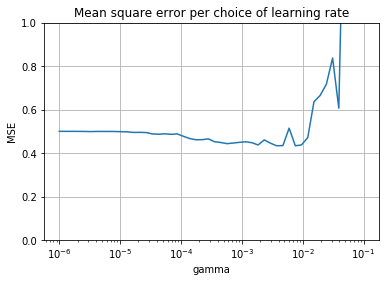

In [13]:
#plot the losses per gamma used
fig, ax = plt.subplots()
ax.semilogx(gammas, losses_sgd)

ax.set(xlabel='gamma', ylabel='MSE',
       title='Mean square error per choice of learning rate')
ax.grid()
ax.set_ylim([0, 1])
plt.show()

In [14]:
idx = np.nanargmin(losses_sgd)

loss_sgd = losses_sgd[idx]
w_sgd = ws_sgd[idx]
gamma_sgd = gammas[idx]

print("w* ={w}\n\nmse={loss}\n\ngamma={gamma}".format(
    w=w_sgd, loss=loss_sgd, gamma=gamma_sgd ))

w* =[-0.04468316 -0.13499198 -0.00318257  0.02746707  0.00931804  0.00743917
  0.00867248  0.0102515  -0.01031069  0.01413886  0.00748626  0.01247268
  0.00993434  0.04517552  0.01181778  0.00964258 -0.0202097   0.01099246
  0.01068739 -0.0560201   0.01093212 -0.00481483  0.03243379  0.00708468
  0.00947362 -0.01217007  0.01018242  0.01156129  0.00921903]

mse=0.43322657479260634

gamma=0.007543120063354623


**Ridge regression**

***Cross-validation hyperparameter selection***

In [15]:
def cross_validation_visualization(lambds, loss_tr, loss_te):
    """visualization the curves of train error and test error."""
    plt.semilogx(lambds, loss_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, loss_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("error")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)

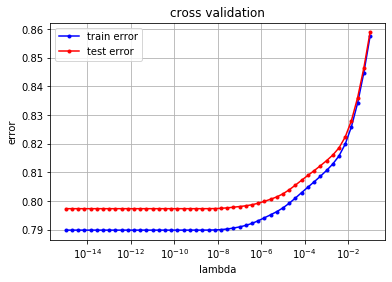

In [16]:
seed = 1
degree = 2
k_fold = 4
lambdas = np.logspace(-15, -1, 50)

k_indices = build_k_indices(y, k_fold, seed)
rmse_tr_cv = []
rmse_te_cv = []

for lambda_ in  lambdas:
    l_rmse_tr = []
    l_rmse_te = []
    for k in range(k_fold):
        loss_tr, loss_te = cross_validation(y, tX, k_indices, k, lambda_, degree)
        l_rmse_tr.append(np.sqrt(2*loss_tr))
        l_rmse_te.append(np.sqrt(2*loss_te))
    rmse_tr_cv.append(np.mean(l_rmse_tr))
    rmse_te_cv.append(np.mean(l_rmse_te))
cross_validation_visualization(lambdas, rmse_tr_cv, rmse_te_cv)

In [17]:
idx = np.nanargmin(rmse_te_cv)
lambda_ri = lambdas[idx]

print("lambda* ={lambda_}\n\nrmse train={rmse_tr}\n\nrmse test={rmse_te}".format(
    lambda_=lambda_ri, rmse_tr=rmse_tr_cv[idx], rmse_te=rmse_te_cv[idx]))

lambda* =1e-09

rmse train=0.7899053400307731

rmse test=0.7973736357872228


***Bias-variance decomposition for complexity determination***

In [18]:
def bias_variance_decomposition_visualization(degrees, loss_tr, loss_te):
    """visualize the bias variance decomposition."""
    loss_tr_mean = np.expand_dims(np.mean(loss_tr, axis=0), axis=0)
    loss_te_mean = np.expand_dims(np.mean(loss_te, axis=0), axis=0)
    plt.plot(degrees, loss_tr.T, 'b', linestyle="-", label='train', linewidth=0.3)
    plt.plot(degrees, loss_te.T, 'r', linestyle="-", label='test', linewidth=0.3)
    plt.plot(degrees, loss_tr_mean.T, 'b', linestyle="-", label='train', linewidth=3)
    plt.plot(degrees, loss_te_mean.T, 'r', linestyle="-", label='test', linewidth=3)
    plt.ylim(0, 5)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.title("Bias-Variance Decomposition")

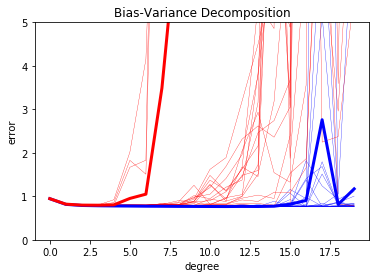

In [19]:
seeds = range(20)
ratio_train = 0.7
degrees = range(0, 20)

rmse_tr_bv = np.empty((len(seeds), len(degrees)))
rmse_te_bv = np.empty((len(seeds), len(degrees)))

for index_seed, seed in enumerate(seeds):
    np.random.seed(seed)
        
    x_tr, x_te, y_tr, y_te = split_data(tX, y, ratio_train, seed)        
        
    mse_tr = []
    mse_te = []
    
    for index_deg, deg in enumerate(degrees): 
        tx_tr = build_poly(x_tr, deg)
        tx_te = build_poly(x_te, deg)
            
        w_tr, mse_tr = ridge_regression(y_tr, tx_tr, lambda_ri)
        mse_te = compute_mse(y_te, tx_te, w_tr)
            
        rmse_tr_bv[index_seed][index_deg] = np.sqrt(2*np.array(mse_tr))
        rmse_te_bv[index_seed][index_deg] = np.sqrt(2*np.array(mse_te))

bias_variance_decomposition_visualization(degrees, rmse_tr_bv, rmse_te_bv)

In [20]:
rmse_te_bv = np.array(rmse_te_bv)
rmse_tr_bv = np.array(rmse_tr_bv)

idx = np.nanargmin(np.mean(rmse_te_bv-rmse_tr_bv, axis=1))

degree_ri = degrees[idx]

print("degree* ={degree}\n\nrmse train={rmse_tr}\n\nrmse test={rmse_te}".format(
    degree=degree_ri, rmse_tr=rmse_tr_bv[idx].mean(), rmse_te=rmse_te_bv[idx].mean()))

degree* =9

rmse train=1.0358994844634908

rmse test=1.3526149660811453


**Logistic regression**

In [23]:
y = np.where(y==-1, 0, y)
print(y)

[1. 0. 0. ... 0. 0. 0.]


In [24]:
initial_w = np.zeros(tX.shape[1])
max_iters = 100
gammas = np.logspace(-20, -2, 50)

losses_lr = []
ws_lr = []
for gamma in gammas:
    (w, loss) = logistic_regression(y, tX, initial_w, max_iters, gamma)
    losses_lr.append(loss)
    ws_lr.append(w)

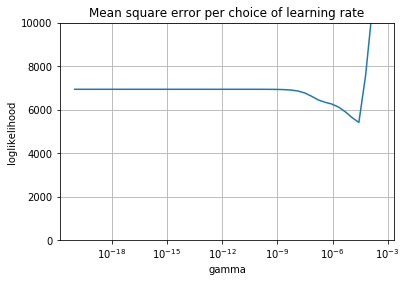

In [30]:
#plot the losses per gamma used
fig, ax = plt.subplots()
ax.semilogx(gammas, losses_lr)

ax.set(xlabel='gamma', ylabel='loglikelihood',
       title='Mean square error per choice of learning rate')
ax.grid()
ax.set_ylim([0, 10000])
plt.show()

In [45]:
idx = np.nanargmin(losses_lr)

loss_lr = losses_lr[idx]
w_lr = ws_lr[idx]
gamma_lr = gammas[idx]

print("w* ={w}\n\nnegative loglikelihood loss={loss}\n\ngamma={gamma}".format(
    w=w_lr, loss=loss_lr, gamma = gamma_lr))

w* =[ 0.05463507 -1.18962843 -0.05415581  0.30078966  0.07974139  0.13681576
  0.07443387  0.08534307 -0.11220208  0.08614684  0.05586676  0.11202356
  0.08540732  0.49290978  0.0859732   0.08675403 -0.22236088  0.08600356
  0.08976516 -0.23213761  0.08164701 -0.13664314 -0.12062378  0.08687638
  0.08507587 -0.25900531  0.08825252  0.0853127  -0.01301648]

negative loglikelihood loss=5406.063508942515

gamma=2.6826957952797274e-05


**Regularized logistic regression**

In [51]:
initial_w = np.zeros(tX.shape[1])
max_iters = 1000
gammas = np.logspace(-6, -1, 50)

losses_rlr = []
ws_rlr = []
for gamma in gammas:
    (w, loss) = reg_logistic_regression(y, tX, lambda_, initial_w, max_iters, gamma)
    losses_rlr.append(loss)
    ws_rlr.append(w)

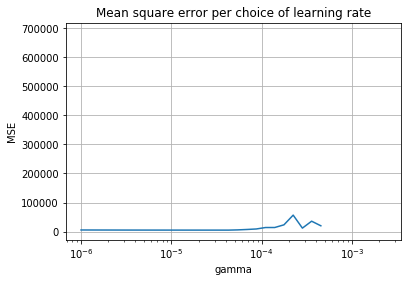

In [52]:
#plot the losses per gamma used
fig, ax = plt.subplots()
ax.semilogx(gammas, losses_rlr)

ax.set(xlabel='gamma', ylabel='MSE',
       title='Mean square error per choice of learning rate')
ax.grid()
#ax.set_ylim([0, 1])
plt.show()

In [53]:
idx = np.nanargmin(losses_rlr)

loss_rlr = losses_rlr[idx]
w_rlr = ws_rlr[idx]
gamma_rlr = gammas[idx]

print("w* ={w}\n\nnegative loglikelihood loss={loss}\n\ngamma={gamma}".format(
    w=w_rlr, loss=loss_rlr, gamma = gamma_rlr))

w* =[ 0.39964258 -1.66494314 -0.66069168  0.30700592  0.08002716  0.23899864
  0.14791879  0.26228578 -0.45099126  0.45919454  0.02007483  0.31170122
  0.15827289  1.54672908  0.16142891  0.17433696 -0.21955627  0.16508903
  0.21448076 -0.09652592  0.09251986 -0.10854727 -0.12752469  0.18871691
  0.1410289  -1.54072201  0.20145227  0.15494419 -0.556347  ]

negative loglikelihood loss=5194.559832973

gamma=4.291934260128778e-05


***Cross-validation hyperparameter selection***

In [ ]:
seed = 1
degree = 2
k_fold = 4
lambdas = np.logspace(-15, -1, 50)

k_indices = build_k_indices(y, k_fold, seed)

log_tr_rlr = []
log_te_rlr = []

for lambda_ in  lambdas:
    l_log_tr = []
    l_log_te = []
    for k in range(k_fold):
        loss_tr, loss_te = cross_validation_log(y, tX, k_indices, k, lambda_, degree, reg_logistic_regression)
        l_log_tr.append(loss_tr)
        l_log_te.append(loss_te)
    log_tr_rlr.append(np.mean(l_log_tr))
    log_te_rlr.append(np.mean(l_log_te))
cross_validation_visualization(lambdas, log_tr_rlr, log_te_rlr)

### Overfitting vs Underfitting

### Methods application and visualization

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)